## **Index:**
- Please ensure R is installed on your machine and packages for Robyn have been installed
- [Import necessary python packages](#import-python-packages)
- Environment Setup:
    - [Setting up environment on WINDOWS machine](#Setting-up-environment-on-WINDOWS-machine)
    - [Setting up environment on LINUX machine](#Setting-up-environment-on-LINUX-machine)
    - [Setting up environment on MAC](#Setting-up-environment-on-MAC)
- Demo Script
    - Provision API
    - Get Data
    - Robyn Inputs
    - Robyn Run
    - Robyn Outputs

#### Import necessary python packages <a class="anchor" id="import-python-packages"></a>

In [3]:
import pandas as pd
import json
import requests
import json
import datetime as dt
import binascii
import io
import pandas as pd
import os
import sys
import subprocess
from urllib.request import urlopen
from bs4 import BeautifulSoup

import pprint
from PIL import Image
Image.MAX_IMAGE_PIXELS = 2**30

#### Setting up environment on WINDOWS machine <a class="anchor" id="Setting-up-environment-on-WINDOWS-machine"></a>

#### Barebones command to run RobynAPI -> <font color='red'> ! START "" /B "<path_where_R_is_installed>\Rscript.exe" "<path_where_robyn_api_files_exist>\api_call.R" </font>
1. Find location where R is installed on your machine. If the location is "C:\Program Files\R\R-4.2.2\bin\" Then use this to replace <path_where_R_is_installed>
2. Find where api files exist and replace it with <path_where_robyn_api_files_exist>
    e.g. ! START "" /B "C:\Program Files\R\R-4.2.2\bin\Rscript.exe" "C:\Documents\GitHub\robyn\robyn_api\api_call.R"

In [1]:
! START "" /B "C:\Program Files\R\R-4.2.2\bin\Rscript.exe" "C:/Users/ebyjose/OneDrive - Facebook/Documents/GitHub/robyn/robyn_api/api_call.R" "> log.out"

#### Steps to run RobynAPI if you are using a <u> LINUX </u> machine/server <a class="anchor" id="Setting-up-environment-on-LINUX-machine"></a>

#### Barebones command to run RobynAPI -> <font color='red'> ! Rscript <path_where_robyn_api_files_exist>\api_call.R &</font>
1. Find location where R is installed on your machine. If the location is "C:\Program Files\R\R-4.2.2\bin\" Then use this to replace <path_where_R_is_installed>
2. Find where api files exist and replace it with <path_where_robyn_api_files_exist>
    
    e.g. # ! Rscript /home/robyn/robyn_api/api-call.R

In [ ]:
! Rscript <path_to_apifile>/api_call.R &

#### Steps to run RobynAPI if you are using a <u> MAC </u> <a class="anchor" id="Setting-up-environment-on-MAC"></a>

#### Barebones command to run RobynAPI -> <font color='red'> subprocess.Popen(["Rscript", "<path_to_apifile>/api_call.R"])</font>
1. Find where api files exist and replace it with <path_to_apifile>
    
    e.g. # subprocess.Popen(["Rscript", "/home/robyn/robyn_api/api_call.R"])

In [ ]:
p = subprocess.Popen(["Rscript", "./api_call.R"])

In [ ]:
p.kill()
p = subprocess.Popen(["Rscript", "./api_call.R"])

## Demo file

In [4]:
apiBaseUrl = "http://127.0.0.1:9999/{}"
url = apiBaseUrl[:-3]+"/openapi.json"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")
apis = json.loads(soup.contents[0])
apis['paths'].keys()

dict_keys(['/dt_simulated_weekly', '/dt_prophet_holidays', '/robyn_inputs', '/robyn_run', '/robyn_outputs', '/robyn_onepagers', '/robyn_allocator', '/robyn_write', '/robyn_recreate'])

# Define Functions

In [5]:
hexToPng = lambda fileName, hexData: Image.open(io.BytesIO(binascii.unhexlify(hexData))).save(fileName, "png")
dateConv = lambda date: dt.datetime.strptime(date, '%Y-%m-%d').date()

In [6]:
def asSerialisedFeather(modelData):
    modelDataFeather = io.BytesIO()
    pd.DataFrame(modelData).to_feather(modelDataFeather)
    modelDataFeather.seek(0)
    modelDataBinary = modelDataFeather.read()
    return binascii.hexlify(modelDataBinary).decode()

# Get Data

In [7]:
# Get the sample dataset from Robyn api for use in later steps
response = requests.post(apiBaseUrl.format('dt_simulated_weekly'))
respJson = json.loads(response.content.decode('utf-8'))
dtSimulatedWeekly = [{'DATE' : dateConv(rec['DATE']),**{col:rec[col]for col in rec if col!='DATE'}} for rec in respJson]
dtSimulatedWeeklyDf = pd.DataFrame(dtSimulatedWeekly)

In [8]:
dtSimulatedWeeklyDf.head()

,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
0,2015-11-23,2.754372e+06,67075.04,0.0,38185.4667,7.290385e+07,0.0000,0,8125009,22821.3987,na,19401.6538
1,2015-11-30,2.584277e+06,85840.36,0.0,0.0000,1.658110e+07,29511.7155,12400,7901549,3425.8574,na,14791.0000
2,2015-12-07,2.547387e+06,0.00,396835.2,1361.6000,4.995477e+07,36132.3590,11360,8300197,12769.1261,na,14544.0000
3,2015-12-14,2.875220e+06,250350.92,0.0,53040.0000,3.164930e+07,36804.2110,12760,8122883,8401.4720,na,2800.0000
4,2015-12-21,2.215953e+06,0.00,832008.0,0.0000,8.802269e+06,28401.7441,10840,7105985,2068.7478,na,15478.0000


In [9]:
# Get the sample dataset from Robyn api for use in later steps
response = requests.post(apiBaseUrl.format('dt_prophet_holidays'))
respJson = json.loads(response.content.decode('utf-8'))
dt_prophet_holidays = pd.DataFrame(respJson)
dt_prophet_holidays.head()

,ds,holiday,country,year
0,1995-01-01,New Year's Day,AD,1995
1,1995-01-06,Epiphany,AD,1995
2,1995-02-28,Carnival,AD,1995
3,1995-03-14,Constitution Day,AD,1995
4,1995-04-14,Good Friday,AD,1995


# Robyn Input

## Step 2a: For first time user: Model specification in 4 steps
### 2a-1: First, specify input variables
    All sign control are now automatically provided: "positive" for media & organic
    variables and "default" for all others. User can still customise signs if necessary.
    Documentation is available, access it anytime by running: ?robyn_inputs

In [10]:
inputArgs = {
    "date_var": "DATE",
    "dep_var": "revenue",
    "dep_var_type": "revenue",
    "prophet_vars": ["trend", "season", "holiday"],
    "prophet_country": "DE",
    "context_vars" : ["competitor_sales_B", "events"],
    "paid_media_spends": ["tv_S", "ooh_S", "print_S", "facebook_S", "search_S"],
    "paid_media_vars": ["tv_S", "ooh_S", "print_S", "facebook_I", "search_clicks_P"],
    "organic_vars" : "newsletter",
    "window_start": "2016-01-01",
    "window_end": "2018-12-31",
    "adstock": "geometric"
}

In [11]:
# Build the payload for the robyn_inputs()
payload = {
    'modelData' : asSerialisedFeather(dtSimulatedWeeklyDf), 
    'holidayData' : asSerialisedFeather(dt_prophet_holidays), 
    'jsonInputArgs' : json.dumps(inputArgs)
}

In [12]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_inputs'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
InputCollect = respJson

In [13]:
InputCollect.keys()

dict_keys(['dt_input', 'dt_holidays', 'dt_mod', 'dt_modRollWind', 'xDecompAggPrev', 'date_var', 'dayInterval', 'intervalType', 'dep_var', 'dep_var_type', 'prophet_vars', 'prophet_signs', 'prophet_country', 'context_vars', 'context_signs', 'paid_media_vars', 'paid_media_signs', 'paid_media_spends', 'paid_media_total', 'mediaVarCount', 'exposure_vars', 'organic_vars', 'organic_signs', 'all_media', 'all_ind_vars', 'factor_vars', 'unused_vars', 'window_start', 'rollingWindowStartWhich', 'window_end', 'rollingWindowEndWhich', 'rollingWindowLength', 'totalObservations', 'refreshAddedStart', 'adstock', 'hyperparameters', 'calibration_input', 'custom_params', 'version'])

## 2a-2: Second, define and add hyperparameters
    Default media variable for modelling has changed from paid_media_vars to paid_media_spends.
    Also, calibration_input are required to be spend names.
    hyperparameter names are based on paid_media_spends names too. See right hyperparameter names:

In [ ]:
# hyper_names(adstock = InputCollect$adstock, all_media = InputCollect$all_media)

In [14]:
# Example hyperparameters ranges for Geometric adstock
inputArgs = {
    "hyperparameters" : {
        "facebook_S_alphas" : [0.5, 3],
        "facebook_S_gammas" : [0.3, 1],
        "facebook_S_thetas" : [0, 0.3],
        "print_S_alphas" : [0.5, 3],
        "print_S_gammas" : [0.3, 1],
        "print_S_thetas" : [0.1, 0.4],
        "tv_S_alphas" : [0.5, 3],
        "tv_S_gammas" : [0.3, 1],
        "tv_S_thetas" : [0.3, 0.8],
        "search_S_alphas" : [0.5, 3],
        "search_S_gammas" : [0.3, 1],
        "search_S_thetas" : [0, 0.3],
        "ooh_S_alphas" : [0.5, 3],
        "ooh_S_gammas" : [0.3, 1],
        "ooh_S_thetas" : [0.1, 0.4],
        "newsletter_alphas" : [0.5, 3],
        "newsletter_gammas" : [0.3, 1],
        "newsletter_thetas" : [0.1, 0.4],
        "train_size": [0.5, 0.8]
    }
}

## 2a-3: Third, add hyperparameters into robyn_inputs()

In [15]:
payload = {
    'InputCollect' : json.dumps(InputCollect), 
    'jsonInputArgs' : json.dumps(inputArgs)
}

In [16]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_inputs'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
InputCollect = respJson

In [17]:
InputCollect.keys()

dict_keys(['dt_input', 'dt_holidays', 'date_var', 'dayInterval', 'intervalType', 'dep_var', 'dep_var_type', 'prophet_vars', 'prophet_signs', 'prophet_country', 'context_vars', 'context_signs', 'paid_media_vars', 'paid_media_signs', 'paid_media_spends', 'paid_media_total', 'mediaVarCount', 'exposure_vars', 'organic_vars', 'organic_signs', 'all_media', 'all_ind_vars', 'factor_vars', 'window_start', 'rollingWindowStartWhich', 'window_end', 'rollingWindowEndWhich', 'rollingWindowLength', 'totalObservations', 'refreshAddedStart', 'adstock', 'version', 'hyperparameters', 'dt_mod', 'dt_modRollWind', 'dt_inputRollWind', 'modNLS'])

## 2a-4: Fourth (optional), model calibration / add experimental input

In [ ]:
# calibration_input <- data.frame(
#   # channel name must in paid_media_vars
#   channel = c("facebook_S",  "tv_S", "facebook_S+search_S", "newsletter"),
#   # liftStartDate must be within input data range
#   liftStartDate = as.Date(c("2018-05-01", "2018-04-03", "2018-07-01", "2017-12-01")),
#   # liftEndDate must be within input data range
#   liftEndDate = as.Date(c("2018-06-10", "2018-06-03", "2018-07-20", "2017-12-31")),
#   # Provided value must be tested on same campaign level in model and same metric as dep_var_type
#   liftAbs = c(400000, 300000, 700000, 200),
#   # Spend within experiment: should match within a 10% error your spend on date range for each channel from dt_input
#   spend = c(421000, 7100, 350000, 0),
#   # Confidence: if frequentist experiment, you may use 1 - pvalue
#   confidence = c(0.85, 0.8, 0.99, 0.95),
#   # KPI measured: must match your dep_var
#   metric = c("revenue", "revenue", "revenue", "revenue"),
#   # Either "immediate" or "total". For experimental inputs like Facebook Lift, "immediate" is recommended.
#   calibration_scope = c("immediate", "immediate", "immediate", "immediate")
# )
# calibration_input %>% as_tibble()
# InputCollect <- robyn_inputs(InputCollect = InputCollect, calibration_input = calibration_input)


In [ ]:
calibration_input = {
    "channel": ["facebook_S","tv_S","facebook_S+search_S","newsletter"],
    "liftStartDate" : ["2018-05-01","2018-04-03","2018-07-01","2017-12-01"],
    "liftEndDate" : ["2018-06-10","2018-06-03","2018-07-20","2017-12-31"],
    "liftAbs" : [400000, 300000, 700000, 200],
    "spend" : [421000, 7100, 350000, 0],
    "confidence" : [0.85, 0.8, 0.99, 0.95],
    "metric" : ["revenue","revenue","revenue","revenue"],
    "calibration_scope" : ["immediate","immediate","immediate","immediate"]
}
calibration_input = pd.DataFrame(calibration_input)
calibration_input

In [ ]:
payload = {
    'InputCollect' : json.dumps(InputCollect), 
    'calibration_input' : asSerialisedFeather(calibration_input), 
}

In [ ]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_inputs'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
InputCollect = respJson

In [ ]:
InputCollect.keys()

# Robyn Run

In [18]:
runArgs = {
    "iterations" : 1000,
    "trials" : 1, 
    "ts_validation" : True,
    "add_penalty_factor" : False,
    "seed" : 123
}

In [19]:
# Build the payload for the robyn run
payload = {
    'InputCollect' : json.dumps(InputCollect), 
    'jsonRunArgs' : json.dumps(runArgs)
}

In [20]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_run'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
OutputModels = respJson

In [21]:
respJson.keys()

dict_keys(['trial1', 'train_timestamp', 'cores', 'iterations', 'trials', 'intercept', 'intercept_sign', 'nevergrad_algo', 'ts_validation', 'add_penalty_factor', 'hyper_updated', 'hyper_fixed', 'convergence', 'ts_validation_plot', 'seed'])

# Robyn Outputs

In [22]:
create_files = False
robyn_directory = 'C:/Robyn/'

In [23]:
outputsArgs = {
    "pareto_fronts" : 'auto', # automatically pick how many pareto-fronts to fill min_candidates (100)
    "min_candidates" : 10, # top pareto models for clustering. Default to 100
    "calibration_constraint" : 0.1, # range c(0.01, 0.1) & default at 0.1
    "csv_out" : "pareto", # "pareto", "all", or NULL (for none)
    "clusters" : True, # Set to TRUE to cluster similar models by ROAS. See ?robyn_clusters
    "export" : create_files, # this will create files locally
    "plot_folder" : robyn_directory, # path for plots exports and files creation
#     "plot_pareto" : create_files # Set to FALSE to deactivate plotting and saving model one-pagers
}

In [24]:
# Build the payload for the robyn_outputs()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputModels' : json.dumps(OutputModels),
    'jsonOutputsArgs' : json.dumps(outputsArgs)
}

In [25]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_outputs'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
OutputCollect = respJson

In [26]:
OutputCollect.keys()

dict_keys(['resultHypParam', 'xDecompAgg', 'mediaVecCollect', 'xDecompVecCollect', 'resultCalibration', 'allSolutions', 'allPareto', 'calibration_constraint', 'OutputModels', 'cores', 'iterations', 'trials', 'intercept_sign', 'nevergrad_algo', 'add_penalty_factor', 'seed', 'UI', 'pareto_fronts', 'hyper_fixed', 'plot_folder', 'clusters', 'hyper_updated'])

In [27]:
sys.getsizeof(response.content.decode('utf-8')) / 1e+6

56.25685

In [28]:
OutputCollect.keys()

dict_keys(['resultHypParam', 'xDecompAgg', 'mediaVecCollect', 'xDecompVecCollect', 'resultCalibration', 'allSolutions', 'allPareto', 'calibration_constraint', 'OutputModels', 'cores', 'iterations', 'trials', 'intercept_sign', 'nevergrad_algo', 'add_penalty_factor', 'seed', 'UI', 'pareto_fronts', 'hyper_fixed', 'plot_folder', 'clusters', 'hyper_updated'])

# Robyn Onepager

In [29]:
pd.DataFrame(OutputCollect['clusters']['models']).T

,0,1,2,3,4,5,6,7
cluster,1,2,3,4,5,6,7,8
rank,1,1,1,1,1,1,1,1
solID,1_138_7,1_141_1,1_133_1,1_142_7,1_117_1,1_128_6,1_129_3,1_137_7
mape,0,0,0,0,0,0,0,0
decomp.rssd,0.338,0.5453,0.42,0.4898,0.4736,0.3879,0.3048,0.3483
nrmse,0.078,0.0701,0.0741,0.0705,0.0726,0.0742,0.0808,0.0759
nrmse_test,0.1065,0.1119,0.1087,0.1089,0.1082,0.107,0.103,0.1056
nrmse_train,0.0533,0.0519,0.0557,0.0537,0.0546,0.0557,0.0521,0.0515
facebook_S_thetas,0.0,1.0,0.3168,0.8858,0.2918,0.3168,0.9656,0.1093
newsletter_thetas,0.935,0.8492,0.7426,0.5054,0.489,0.7426,0.0,0.8606


In [30]:
for i in OutputCollect['clusters']['models']:
    print(i['solID'])

1_138_7
1_141_1
1_133_1
1_142_7
1_117_1
1_128_6
1_129_3
1_137_7


In [31]:
select_model = '1_138_7'

In [32]:
onepagersArgs = {
    "select_model" : select_model, # automatically pick how many pareto-fronts to fill min_candidates (100)
    "export" : False, # this will create files locally
}

In [33]:
# Build the payload for the robyn_onepagers()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputCollect' : json.dumps(OutputCollect),
    "jsonOnepagersArgs": json.dumps(onepagersArgs),
    'dpi' : 300,
    'width' : 15,
    'height' : 20
}

In [34]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_onepagers'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
onepager = respJson

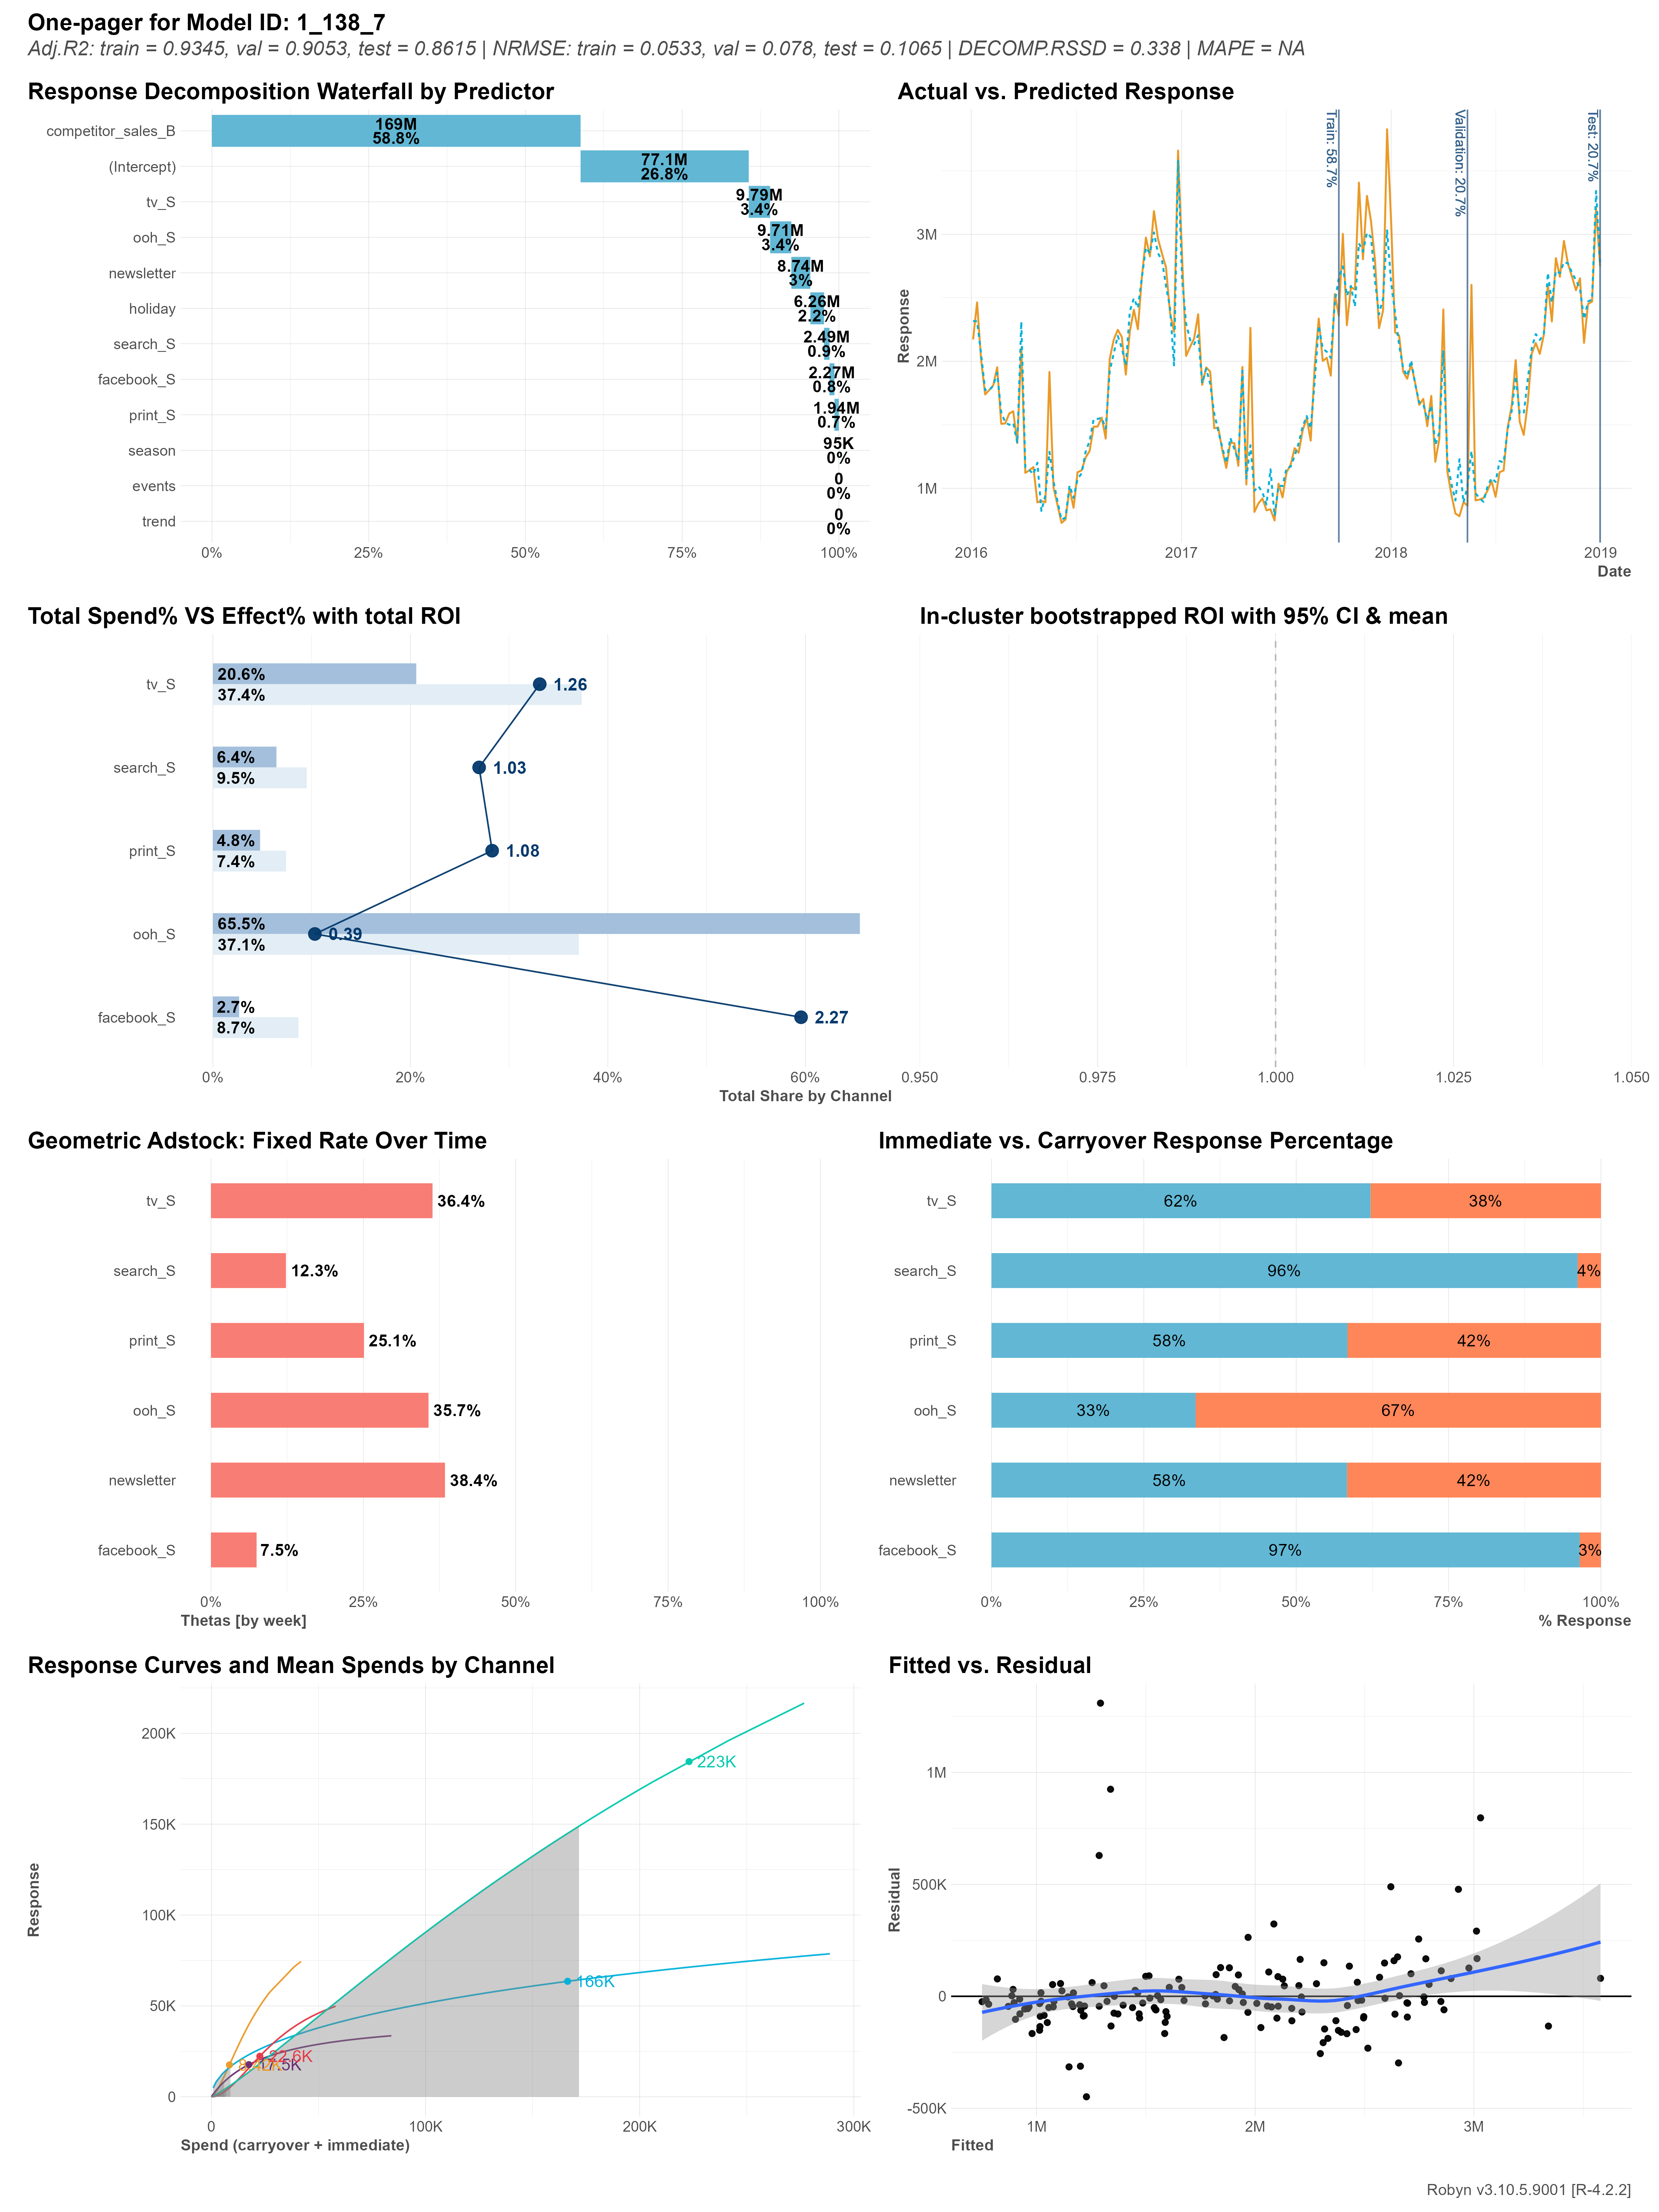

In [35]:
Image.open(io.BytesIO(binascii.unhexlify("".join(onepager))))

# Robyn Allocator

In [36]:
allocatorArgs = {
    "select_model" : select_model,
#     "date_range" : None, # Default last month as initial period
#     "total_budget" : None, # When NULL, default is total spend in date_range
    "channel_constr_low" : 0.7,
    "channel_constr_up" : 1.2,
    "channel_constr_multiplier" : 3,
    "scenario" : "max_response",
    "export" : False,
}

In [37]:
# Build the payload for the robyn_allocator()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputCollect' : json.dumps(OutputCollect),
    "jsonAllocatorArgs": json.dumps(allocatorArgs),
    'dpi' : 300,
    'width' : 15,
    'height' : 15
}

In [38]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_allocator'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
allocator = respJson

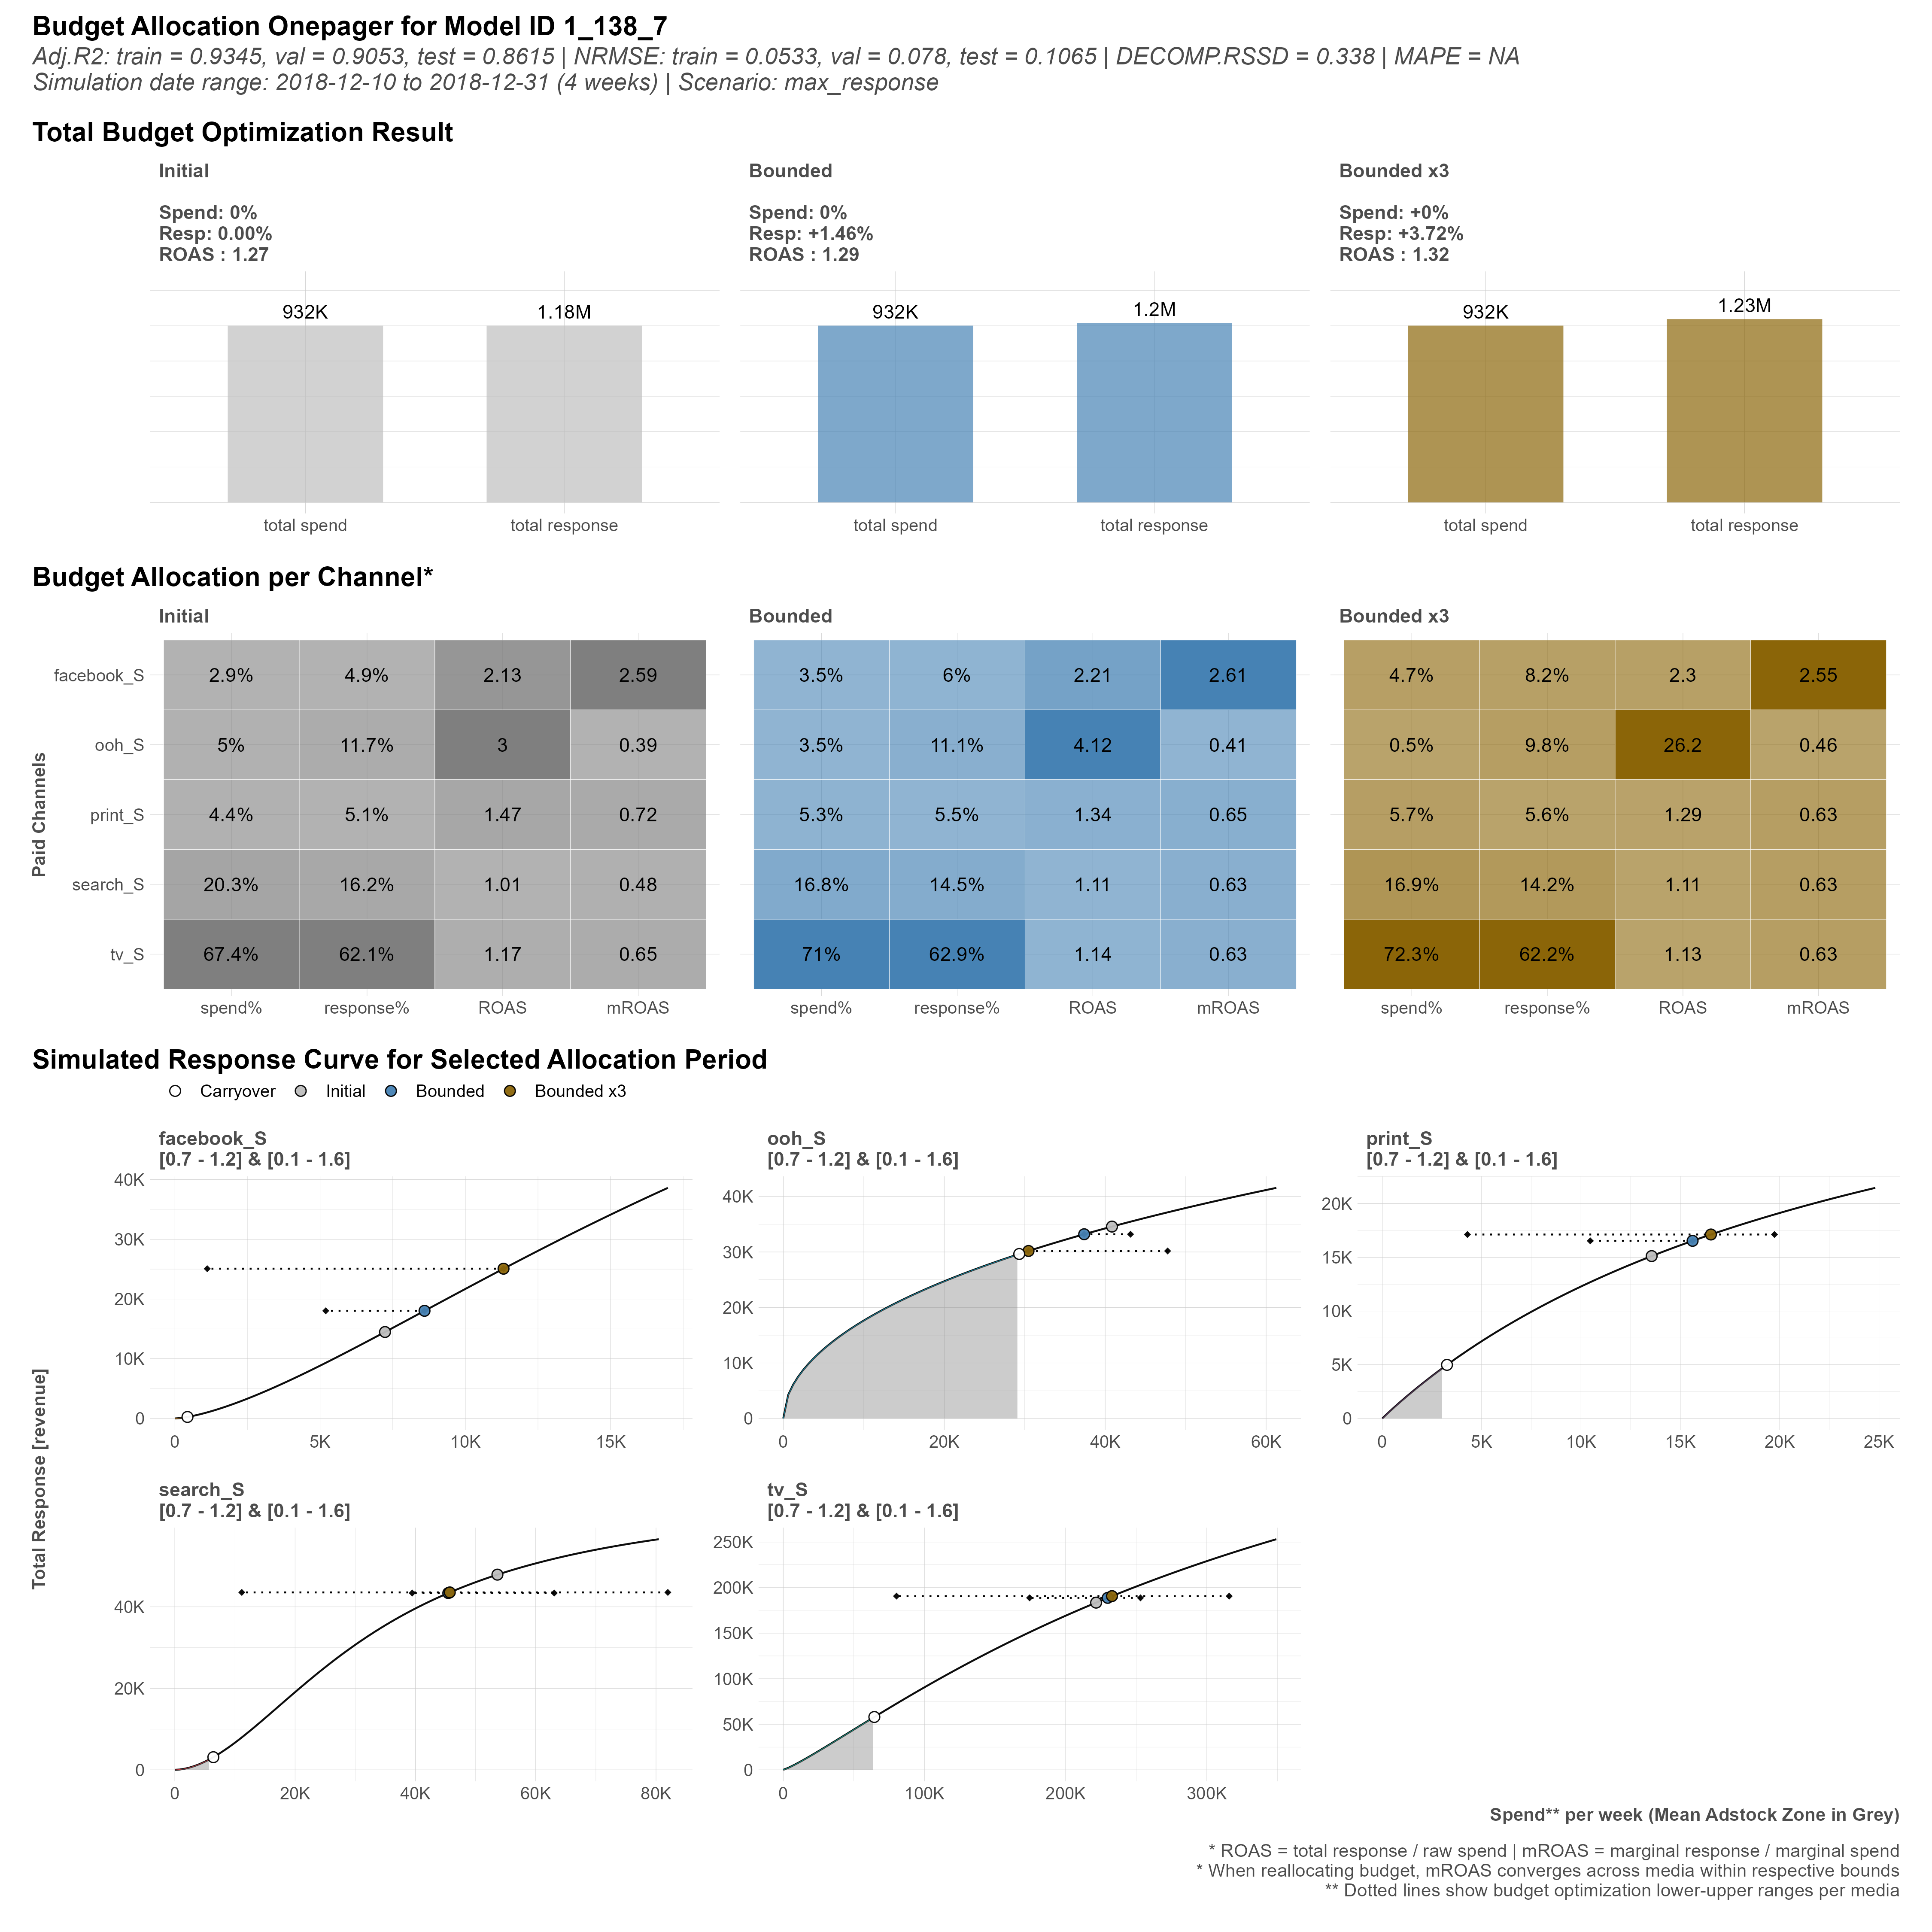

In [39]:
Image.open(io.BytesIO(binascii.unhexlify("".join(allocator))))

In [ ]:
p.kill()